In [ ]:
%matplotlib notebook

In [ ]:
pip install specreduce numpy pandas matplotlib prettytable

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import astropy as ap
from matplotlib.ticker import LogFormatterExponent
import specreduce
from astropy.io import fits
from matplotlib.ticker import FuncFormatter
import matplotlib.ticker as ticker
from specreduce.calibration_data import AtmosphericTransmission
from scipy.interpolate import interp1d
from scipy.integrate import simpson
import pandas as pd
from astropy.constants import c
import matplotlib.image as mpimg
import os



### Henna Abunemeh HWK 1

### Even though you are submitting these with `git` and this file tells you to rename it, and you should be pushing to a dedicated folder with your username, please also stick your name in this file here, so there's extra redundancy. 

The point of this assignment is to:
- get comfortable with photon energy, frequency, and wavelength - calculate power and luminosity
- know now to convert magnitudes, fluxes, photon counts.
- start basic Python scripts and plotting

# Q1. Make plot of the electromagnetic spectrum using Python. (30 pts)
- Your plot should have multiple x-axes - one for wavelength (in meters), one for frequency (in Hz), one for energy (in eV)
    (hint: `gridspec` or `subplots` in general can be used to do this. See if you can find something useful here: https://matplotlib.org/stable/gallery/index) (10 pts)
- axes should be lograthmic, and each of these axes should have ticklabels that are exponential above or below (5 pts)
- the wavelength axes should also have more conventional SI units for km, mm, micron, nm, Angstrom, and picometer labelled (5 pts)
- label each region of the EM spectrum (10 pts)

 Something like this: 

<img src="https://aktinovolia.com/wp-content/uploads/aktinovolia.com-radiation-chart-electromagnetic-spectrum-rf-em-spectrum-rf-electromagnetic-3-.jpg">

or (except you should have energy too) 

<img src="https://multiphaseism.wordpress.com/wp-content/uploads/2013/05/electromagnetic_spectrum.jpg">

# Remember to save your script. Stay organized. You will be reusing code.

You are encouraged to add your own flourishes to the plot.
Joseph is empowered to give out 5 points as he sees fit for aesthetics. 

Keep this plot handy. You should be able to intuitively convert between these values in your head. 

/var/folders/7w/tjwz_8cs4_s5tmwrjlrv2kdr0000gn/T/ipykernel_35960/2894545838.py:169: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(pad=0.5)


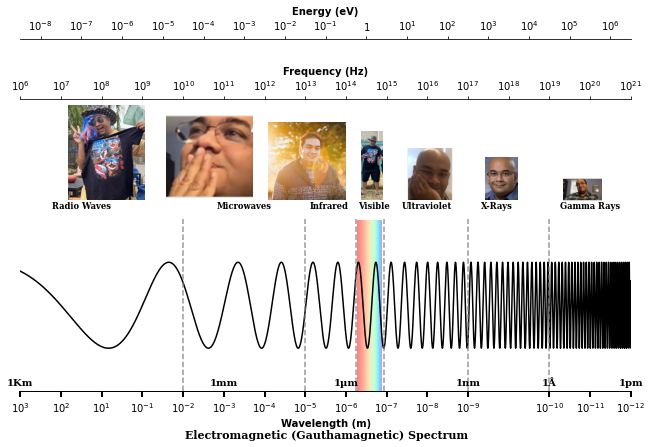

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg  # For loading and displaying images
import os

# Constants
h = 4.135667696e-15  # Planck's constant in eV·s
c = 3e8  # Speed of light in m/s

# Wavelengths in meters (log scale)
wavelengths = np.logspace(-12, 3, 10000)  # From 1 pm to 1 km
frequencies = c / wavelengths  # Frequencies in Hz
energies = h * frequencies  # Energies in eV

# Custom font for axis labels
font = {'fontsize': 10, 'fontweight': 'bold'}

with plt.style.context('seaborn-v0_8-dark-palette'):
    # Create figure and axes
    fig, ax1 = plt.subplots(figsize=(9, 6))

    # Secondary X-axes for Frequency and Energy
    ax2 = ax1.twiny()  # Frequency axis
    ax3 = ax1.twiny()  # Energy axis
    ax2.spines['top'].set_position(('outward', 120))  # Offset Frequency (closer to the main axis)
    ax3.spines['top'].set_position(('outward', 180))  # Offset Energy (further from the main axis)

    # Create a new axis for additional ticks for SI units directly over the wavelength axis
    ax4 = ax1.twiny()
    ax4.spines['top'].set_position(('axes',0 ))  # Place the SI units axis directly over ax1

    # Set x-limits for all axes
    ax1.set_xlim(np.min(wavelengths), np.max(wavelengths))  # Wavelength
    ax2.set_xlim(3e6, 3e20)  # Scaling Frequency range
    ax3.set_xlim(10**(-8.5), 10**(6.5))  # Scaling Energy range
    ax4.set_xlim(np.min(wavelengths), np.max(wavelengths))  # Scaling ticks on the same range

    # Set all x-axes to log scale
    ax1.set_xscale('log')
    ax2.set_xscale('log')
    ax3.set_xscale('log')
    ax4.set_xscale('log')

    # Wavelength axis label
    ax1.set_xlabel('Wavelength (m)', fontdict=font)
    ax2.set_xlabel('Frequency (Hz)', fontdict=font)
    ax3.set_xlabel('Energy (eV)', fontdict=font)

    # Set tick labels for the axes
    wavelength_ticks = [1e-12, 1e-11, 1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e1, 1e2, 1e3][::-1]
    wavelength_labels = [r'$10^{-12}$', r'$10^{-11}$', r'$10^{-10}$', r'$10^{-9}$', r'$10^{-8}$', r'$10^{-7}$', r'$10^{-6}$',
                         r'$10^{-5}$', r'$10^{-4}$', r'$10^{-3}$', r'$10^{-2}$', r'$10^{-1}$', r'$10^{1}$', r'$10^{2}$', r'$10^{3}$']
    ax1.set_xticks(wavelength_ticks)
    ax1.set_xticklabels(wavelength_labels)

    frequency_ticks = [1e6, 1e7, 1e8, 1e9, 1e10, 1e11, 1e12, 1e13, 1e14, 1e15, 1e16, 1e17, 1e18, 1e19, 1e20, 1e21]
    frequency_labels = [r'$10^6$', r'$10^7$', r'$10^8$', r'$10^9$', r'$10^{10}$', r'$10^{11}$', r'$10^{12}$', r'$10^{13}$',
                        r'$10^{14}$', r'$10^{15}$', r'$10^{16}$', r'$10^{17}$', r'$10^{18}$', r'$10^{19}$', r'$10^{20}$', r'$10^{21}$']
    ax2.set_xticks(frequency_ticks)
    ax2.set_xticklabels(frequency_labels)

    energy_ticks = [1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4, 1e5, 1e6]
    energy_labels = [r'$10^{-8}$', r'$10^{-7}$', r'$10^{-6}$', r'$10^{-5}$', r'$10^{-4}$', r'$10^{-3}$', r'$10^{-2}$', r'$10^{-1}$',
                     r'$1$', r'$10^{1}$', r'$10^{2}$', r'$10^{3}$', r'$10^{4}$', r'$10^{5}$', r'$10^{6}$']
    ax3.set_xticks(energy_ticks)
    ax3.set_xticklabels(energy_labels)

    # SI unit labels directly over the wavelength axis
    SI_ticks = [1e-1, 1e-4, 1e-7, 1e1, 1e-12, 1e3]
    SI_labels = ['1nm', '1µm', '1mm', '1Å', '1Km', '1pm']
    ax4.set_xticks(SI_ticks)
    ax4.set_xticklabels(SI_labels, fontsize=10, font='serif', weight='bold')

    # Hide x-ticks for the SI axis and only show the SI ticks
    ax4.tick_params(axis='x', direction='in', length=6, width=2, colors='black')
    ax4.spines['top'].set_color('none')

    ax1.tick_params(axis='x', direction='out', length=6, width=2, colors='black')

    # Hide spines for all axes
    for ax in [ax1, ax2, ax3, ax4]:
        ax.spines['left'].set_color('none')
        ax.spines['right'].set_color('none')
    ax1.spines['top'].set_color('none')
    ax1.spines['bottom'].set_color('none')

    # Plot intensity wave
    intensity = np.sin(np.power(wavelengths * 1e9, 0.15) * 2 * np.pi)
    ax1.plot(wavelengths, intensity / 4, color='black', label='Intensity Variation')

    # Add rainbow gradient for visible range
    rainbow_start = 0.8e-3  # 750 nm
    rainbow_end = 1.9e-4  # 380 nm THIS TECHNICALLY ISNT THE TRUE NUMBER BUT IT SHWOS UP CORRRECTLY ON PLOT

    gradient = np.linspace(0, 1, 256).reshape(1, -1)
    gradient = np.vstack((gradient, gradient))

    ax1.imshow(gradient, aspect='auto', cmap='rainbow', interpolation='bicubic',
               extent=[rainbow_start, rainbow_end, -0.5, 0.5], alpha=0.5)

    # Define spectrum boundaries and labels
    boundaries = [
        (1e1, 'X-Ray'), 
        (1e-1, 'UV'),
        (8.7e-4, 'Vs'),
        (1.8e-4, 'IR'),
        (1e-5, 'Micro'),
        (1e-8, 'Radio')
    ]

    # Add dashed lines at boundaries
    for (boundary, _) in boundaries:
        ax1.axvline(x=boundary, color='gray', linestyle='--', alpha=0.8)

    # Define regions for waves
    regions = [
        (1e2, 1e2, 'Gamma Rays'),
        (0.05e1, 0.05e1, 'X-Rays'),
        (1e-2, 1e-2, 'Ultraviolet'),
        (8.7e-4, 1e-4, 'Visible'),
        (3.9e-5, 3.9e-5, 'Infrared'),
        (10**(-6.5), 10**(-6.5), 'Microwaves'),
        (10**(-10.5), 10**(-10.5), 'Radio Waves')
    ]

    # Add text labels for wave regions
    for (start, end, label) in regions:
        mid = (start + end) / 2
        ax1.text(mid, 0.58, label, color='black', fontsize='small', ha='center', va='center', fontweight='bold', fontfamily='serif')

    # Hide y-axis numbering
    ax1.get_yaxis().set_visible(False)

    # THE LABELS ARE NOT DIRECTLY ACCURATE, THEY WERE ORIGINALLY BACKWARDS
    # AND THEN I CHANGED THE FILE PATHS SO THEYRE NOT DIRECTLY RELATED TO THEIR LABEL
    # Load the image files using mpimg
    image_paths = {
        'Gamma Rays': '503Homework1/Images/Im4.png',  
        'X-Rays': '503Homework1/Images/Im2.png',      
        'uv': '503Homework1/Images/Im6.jpg',         
        'vs': '503Homework1/Images/Im7.png',       
        'ir': '503Homework1/Images/Im3.png',      
        'mcr': '503Homework1/Images/Im5.png',        
        'radio': '503Homework1/Images/Im1.png'        
    }

    # Define the size (width, height) and positions of the images using add_axes
    image_axes_params = {
        'Gamma Rays': [0.05, 0.54, 0.22, 0.22],  # larger
        'X-Rays': [0.22, 0.54, 0.2, 0.2],        # medium size
        'uv': [0.38, 0.54, 0.18, 0.18],          # smaller
        'vs': [0.49, 0.54, 0.16, 0.16],          # smallerr
        'ir': [0.6, 0.54, 0.12, 0.12],           # smallerrr
        'mcr': [0.72, 0.54, 0.1, 0.1],           # smul
        'radio': [0.85, 0.52, 0.09, 0.09]        # smallest
    }

    # Loop over the images
    for label, img_path in image_paths.items():
        if os.path.exists(img_path):
            image = mpimg.imread(img_path)
            ax_img = fig.add_axes(image_axes_params[label])  # Create a new axis for each image
            ax_img.imshow(image)
            ax_img.axis('off')
        else:
            print(f"Image for {label} not found at {img_path}")

    # Adjust layout
    plt.tight_layout(pad=0.5)
    fig.text(0.5, -0.01, "Electromagnetic (Gauthamagnetic) Spectrum", ha='center', font='serif', weight='bold', fontsize=11)

    plt.show()



# Q2. Dealing with Data from Multiple Sources - adding passbands and atmospheric transmission (30 pts)

### 2.1
Get the Optical Atmospheric Transmission using the `specreduce` package
    `pip install specreduce`
    https://specreduce.readthedocs.io/en/latest/extinction.html

Note that the optical transmission curves do not include the effect of molecules as the website tells you.
Follow their instructions to add 2.3mm of Preciptiable Water Vapr at an Airmass of 1.0 to the optical transmission. 

Get NIR and MIR transmission curves from here (we're not using MIR this week, but you'll use this code next HW as well)
	http://www.gemini.edu/sciops/telescopes-and-sites/observing-condition-constraints/ir-transmission-spectra
(Cerro Pachon, 2.3mm of Precipitable Water Vapor, Airmass 1.0)


### 2.2
Get the LSST Filter Transmissions (ugrizy, filter only) from here:
http://svo2.cab.inta-csic.es/theory/fps3/index.php?mode=browse

and the IRTF (\[JHK\]_MK, filter only) transmissions from here:
https://irtfweb.ifa.hawaii.edu/~nsfcam2/Filter_Profiles.html

## !Please note that the filter tranmissions are determined by counting photons, not measuing energy! 

### 2.3

Finally, get the SEDs of three stars from CALSPEC:
https://www.stsci.edu/hst/instrumentation/reference-data-for-calibration-and-tools/astronomical-catalogs/calspec
and for the actual data:
https://archive.stsci.edu/hlsps/reference-atlases/cdbs/current_calspec/

(There is no M5V but there is a M3.5V star - BD-11 3759)


Finally, reconstruct a plot like this (set the wavelength ranges appropriately for the filters I've listed)
<img src="https://www.researchgate.net/profile/C-Chiosi/publication/1925441/figure/fig1/AS:339731901632519@1458009805844/The-filter-sets-used-in-the-present-work-From-top-to-bottom-we-show-the-filter-detector.png">

except replace the middle panel with the atmospheric transmission from your interpolator.

Something like this for the atmosphere plot (but until the wavelength you need): 
<img src="https://www.researchgate.net/profile/Joseph-Shaw-3/publication/260940640/figure/fig3/AS:296902361927680@1447798447054/Atmospheric-transmittance-versus-wavelength-calculated-with-Modtran5-for-a-zenith.png">

In [3]:
def load_lsst_filters():
    filters = ['g', 'i', 'r', 'u', 'y', 'z']
    data = {}
    for filt in filters:
        filename = f'503Homework1/LSST_LSST.{filt}_filter.dat'
        try:
            # Skip the header rows and use space as delimiter
            data[filt] = np.loadtxt(filename, delimiter=' ', skiprows=1)
        except Exception as e:
            print(f"Error loading file {filename}: {e}")
    return data



# Load NIR Transmission Data

def load_nir_transmission():
    nir_data = np.loadtxt('503Homework1/cptrans_zm_23_10.dat.txt')
    return nir_data[:, 0]*1e4, nir_data[:, 1]

# Load 2.3mmPWV Transmission Data
def load_pwv_transmission():
    pwv_data = np.loadtxt('503Homework1/2.3mm_pwv_transmission.txt', delimiter=',', skiprows=1)
    return pwv_data[:, 0], pwv_data[:, 1]

#atm1.6mm
def load_atm_transmission():
    try:
        wavelengths = []
        transmissions = []
        
        with open('503Homework1/atm_transmission_secz1.5_1.6mm.dat.txt', 'r') as file:
            # Skip header if any
            next(file)  # If there is a header, remove this line if not needed
            
            for line in file:
                # Strip any leading/trailing whitespace and split by spaces
                parts = line.strip().split()
                if len(parts) == 2:  # Ensure there are exactly two columns
                    try:
                        wavelengths.append(float(parts[0]))
                        transmissions.append(float(parts[1]))
                    except ValueError:
                        print(f"Skipping invalid line: {line}")
        
        return np.array(wavelengths), np.array(transmissions)
    
    except Exception as e:
        print(f"Error loading atmospheric transmission data: {e}")
        return None, None



def load_irtf_filters():
    filters = ['jmk', 'hmk', 'kmk']
    data = {}
    for filt in filters:
        filename = f'503Homework1/nsfcam_{filt}_trans.dat.txt'
        try:
            data[filt] = np.loadtxt(filename, delimiter='\t', skiprows=1)
            # Convert to angstrom
            data[filt][:, 0] *= 1e4
        except Exception as e:
            print(f"Error loading file {filename}: {e}")
    return data


def load_star_seds():
    seds = {
        'Sun': '503Homework1/sun_reference_stis_002.fits',
        'Vega': '503Homework1/alpha_lyr_stis_011.fits',
        'BD-11 3759': '503Homework1/bd11d3759_stis_003.fits'
    }
    data = {}
    for star, file in seds.items():
        try:
            with fits.open(file) as hdul:
                # Access based on the column names
                col_names = hdul[1].data.names

                if star == 'Sun':
                    data[star] = {
                        'WAVELENGTH': hdul[1].data['WAVELENGTH'],
                        'FLUX': hdul[1].data['FLUX']
                    }
                elif star == 'Vega':
                    data[star] = {
                        'WAVELENGTH': hdul[1].data['WAVELENGTH'],
                        'FLUX': hdul[1].data['FLUX']
                    }
                elif star == 'BD-11 3759':
                    data[star] = {
                        'WAVELENGTH': hdul[1].data['WAVELENGTH'],
                        'FLUX': hdul[1].data['FLUX']
                    }
        except Exception as e:
            print(f"Error loading file {file}: {e}")
    return data

/var/folders/7w/tjwz_8cs4_s5tmwrjlrv2kdr0000gn/T/ipykernel_35960/1113928206.py:77: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(pad=2)


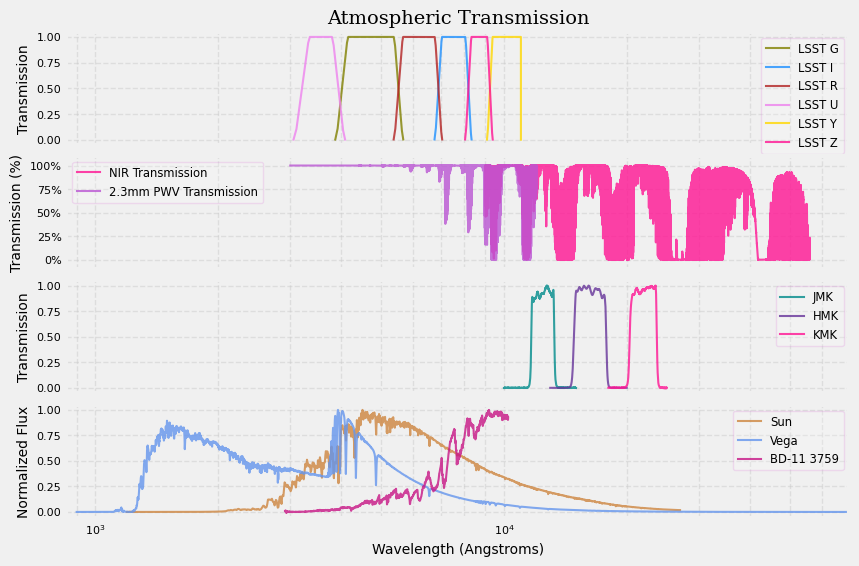

In [4]:
def plot_figure():
    # Define the font and style prettyyyyyyy colorsss
    with plt.style.context('fivethirtyeight'):
        fig, axs = plt.subplots(4, 1, figsize=(9, 6), gridspec_kw={'hspace': 0.1}, sharex=True)
    # Define colors for LSST Filters
    colors = {
        'g': 'olive',
        'i': 'dodgerblue',
        'r': 'firebrick',
        'u': 'violet',
        'y': 'gold',
        'z': 'deeppink'
    }

    # Plot LSST Filters (First Section)
    lsst_filters = load_lsst_filters()
    for filt, data in lsst_filters.items():
        data_normalized = data[:, 1] / np.max(data[:, 1])
        color = colors.get(filt, 'black')
        axs[0].plot(data[:, 0], data_normalized, label=f'LSST {filt.upper()}', color=color, alpha=0.8)
    axs[0].set_ylabel('Transmission', fontsize='medium')
    axs[0].legend(fontsize='small', edgecolor='orchid', framealpha=0.2, fancybox=True, loc='upper right')
    
    
    font = {'family': 'serif', 'color': 'black', 'weight': 'normal', 'size': 14}
    axs[0].set_title('Atmospheric Transmission', fontdict=font)
    
    axs[0].set_xscale('log')
    axs[0].tick_params(axis='both', which='major', labelsize=8)
    axs[0].grid(True, which='both', linestyle='--', alpha=0.5)

    # Plot Transmission Curves (Second Section)
    wavelengths_nir, transmissions_nir = load_nir_transmission()
    wavelengths_pwv, transmissions_pwv = load_pwv_transmission()
    transmissions_nir_percentage = (transmissions_nir / np.max(transmissions_nir)) * 100
    transmissions_pwv_percentage = (transmissions_pwv / np.max(transmissions_pwv)) * 100

    axs[1].plot(wavelengths_nir, transmissions_nir_percentage, color='deeppink', label='NIR Transmission', alpha=0.8)
    axs[1].plot(wavelengths_pwv, transmissions_pwv_percentage, color='mediumorchid', label='2.3mm PWV Transmission', alpha=0.8)
    axs[1].set_ylabel('Transmission (%)', fontsize='medium')
    axs[1].legend(fontsize='small', edgecolor='orchid', framealpha=0.2, fancybox=True)
    axs[1].set_xscale('log')
    axs[1].set_ylim(-10, 110)
    
    # Apply percentage format with % sign
    axs[1].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)}%'))
    
    axs[1].tick_params(axis='both', which='major', labelsize=8)
    axs[1].grid(True, which='both', linestyle='--', alpha=0.5)

    # Plot IRTF Filters (Third Section)
    irtf_filters = load_irtf_filters()
    filter_colors = {'jmk': 'darkcyan', 'hmk': 'rebeccapurple', 'kmk': 'deeppink'}
    for filt, data in irtf_filters.items():
        data_normalized = data[:, 1] / np.max(data[:, 1])
        color = filter_colors.get(filt.lower(), 'black')
        axs[2].plot(data[:, 0], data_normalized, label=f'{filt.upper()}', color=color, alpha=0.8)
    axs[2].set_ylabel('Transmission', fontsize='medium')
    axs[2].legend(fontsize='small', edgecolor='orchid', framealpha=0.2, fancybox=True, loc='upper right')
    axs[2].tick_params(axis='both', which='major', labelsize=8)
    axs[2].grid(True, which='both', linestyle='--', alpha=0.5)

    # Plot Star SEDs (Fourth Section)
    star_seds = load_star_seds()
    for star, flux in star_seds.items():
        flux_normalized = flux['FLUX'] / np.max(flux['FLUX'])
        color = {'Sun': 'peru', 'Vega': 'cornflowerblue', 'BD-11 3759': 'mediumvioletred'}.get(star, 'black')
        axs[3].plot(flux['WAVELENGTH'], flux_normalized, label=f'{star}', color=color, alpha=0.8)
    axs[3].set_xlabel('Wavelength (Angstroms)', fontsize='medium')
    axs[3].set_ylabel('Normalized Flux', fontsize='medium')
    axs[3].legend(fontsize='small', edgecolor='orchid', framealpha=0.2, fancybox=True)
    axs[3].set_xscale('log')
    axs[3].set_xlim(850, 70000)
    axs[3].tick_params(axis='both', which='major', labelsize=8)
    axs[3].grid(True, which='both', linestyle='--', alpha=0.5)

    plt.tight_layout(pad=2)
    plt.show()

plot_figure()


# Q3. Combine the filter transmission and your atmosphere transmission - we'll assume the mirror and CCDs are perfect over the entire wavelength range. Implement the integrals for flux and magnitude discussed in Lecture 3 as python code. (40 pts)

- You'll have to do something to `interpolate` measurements continuously across the full wavelength range you have across Optical to NIR (you can ignore the MIR file for now, but you'll want it next week)
- Make sure the units are consistent for both wavelength and transmission before you write your interpolator or address differences in some other way 
- You'll need to make sure your interpolator can match the wavelength spacing of the SEDs in Q2
- Rememeber that the intergrals intclude the transmission $T(\lambda)$, which is not normalized properly, so make sure to normalize your integral appropriately
- Normalize the synthetic flux in two ways
    1. such as Vega has magnitude 0 in each band.
    2. such that a synthetic AB source has magnitude 0 in each band

Report the magitudes of the Sun and BD-11 3759 in the Vega and AB system, and the AB magnitudes of Vega in a table (columns = passbands, rows = star/system)

- 15 pts each for the Sun and BD-11 3759 (2 pts for the six optical bands, 1 pt each for JHK) 
- 10 pts for the AB mags of Vega (yes, I know there are 9 bands, not 10, but you can have the one extra)

In [5]:

# Speed of light in Å/s
c = 2.998e18

# Clipping function
def clip_wavelengths_and_flux(wavelengths, values, min_wave=3000, max_wave=25500):
    mask = (wavelengths >= min_wave) & (wavelengths <= max_wave)
    return wavelengths[mask], values[mask]

# LOAD ALL DATA AGAIN AND CLIP IT
# Load LSST Filters
def load_lsst_filter_data():
    filters = ['g', 'i', 'r', 'u', 'y', 'z']
    filter_data = {}
    for filt in filters:
        filename = f'503Homework1/LSST_LSST.{filt}_filter.dat'
        try:
            filter_data[filt] = np.loadtxt(filename, delimiter=' ', skiprows=1)
        except Exception as e:
            print(f"Error loading file {filename}: {e}") #error handling
    return filter_data

# Load IRTF Filters
def load_irtf_filter_data():
    filters = ['jmk', 'hmk', 'kmk']
    filter_data = {}
    for filt in filters:
        filename = f'503Homework1/nsfcam_{filt}_trans.dat.txt'
        try:
            filter_content = np.loadtxt(filename, delimiter='\t', skiprows=1)[::-1]
            wavelengths, transmissions = filter_content[:, 0] * 1e4, filter_content[:, 1]  # Convert microns to Ångstroms
            filter_data[filt] = np.column_stack((wavelengths, transmissions))
        except Exception as e:
            print(f"Error loading file {filename}: {e}") #error handling
    return filter_data

# Load Star SEDs and clip between 3000 Å and 25000 Å (best range for data)
def load_star_sed_data():
    seds = {
        'Sun': '503Homework1/sun_reference_stis_002.fits',
        'Vega': '503Homework1/alpha_lyr_stis_011.fits',
        'BD-11 3759': '503Homework1/bd11d3759_stis_003.fits'
    }
    sed_data = {}
    for star_name, file in seds.items():
        try:
            with fits.open(file) as hdul:
                wavelengths = hdul[1].data['WAVELENGTH']
                flux = hdul[1].data['FLUX']
                clipped_wavelengths, clipped_flux = clip_wavelengths_and_flux(wavelengths, flux)
                sed_data[star_name] = {'WAVELENGTH': clipped_wavelengths, 'FLUX': clipped_flux}
        except Exception as e:
            print(f"Error loading file {file}: {e}")  #error handling
    return sed_data

class MagnitudeCalculator:
    def __init__(self, flux_data, filter_data, transmission_data):
        self.flux_data = flux_data  # Star SED flux 
        self.filter_data = filter_data  # Filter transmission (numpy array)
        
        if isinstance(transmission_data, tuple):
            transmission_data = np.column_stack(transmission_data)
        self.transmission_data = transmission_data  # Atmospheric transmission (numpy array)

        self.filter_data[self.filter_data[:, 1] < 0, 1] = 0
        self.transmission_data = self._sort_by_wavelength(self.transmission_data)

        self.AB_reference_flux = np.ones(self.filter_data.shape)
        self.AB_reference_flux[:, 0] = self.filter_data[:, 0]
        self.AB_reference_flux[:, 1] = self.calculate_AB_flux(self.AB_reference_flux[:, 0])

    def calculate_AB_flux(self, wavelength):
        F_nu = 3.631e-20  # AB reference flux in erg/s/cm²/Hz
        F_lambda = F_nu * c / (wavelength**2)  # Convert from F_nu to F_lambda using c
        return F_lambda

    def _sort_by_wavelength(self, data_array):
        #Sort array by the first column and keep unique values
        sorted_array = data_array[data_array[:, 0].argsort()]
        _, unique_indices = np.unique(sorted_array[:, 0], return_index=True)
        return sorted_array[unique_indices]

    def interpolate_filter_transmission(self, flux_wavelengths, filter_wavelengths, filter_transmission):
        #Interpolate filter data onto the flux grid.
        interpolated_transmission = np.interp(flux_wavelengths, filter_wavelengths, filter_transmission)
        return interpolated_transmission

    def calculate_flux_in_band(self, flux_data, filter_data, band_name):
        #Calculate integrated flux in a given band.
        band_ranges = {
            'J': (10000, 15000),
            'H': (15000, 18000),
            'K': (20000, 25000)
        }

        if band_name == 'J':
            j_band_min, j_band_max = band_ranges['J']
            mask = (flux_data['WAVELENGTH'] >= j_band_min) & (flux_data['WAVELENGTH'] <= j_band_max)
            if np.any(mask):
                flux_wavelengths = flux_data['WAVELENGTH'][mask]
                flux_values = flux_data['FLUX'][mask]
            else:
                return 0

        else:
            if isinstance(flux_data, dict):  # If flux is a dictionary (SED case)
                flux_wavelengths = flux_data['WAVELENGTH']
                flux_values = flux_data['FLUX']
            else:  # For AB reference flux, which is a numpy array
                flux_wavelengths = flux_data[:, 0]
                flux_values = flux_data[:, 1]

        filter_wavelengths = filter_data[:, 0]
        filter_transmission = filter_data[:, 1]

        if np.min(filter_wavelengths) > np.max(flux_wavelengths) or np.max(filter_wavelengths) < np.min(flux_wavelengths):
            return np.nan

        filter_interp = self.interpolate_filter_transmission(flux_wavelengths, filter_wavelengths, filter_transmission)
        trans_interp = self.interpolate_filter_transmission(flux_wavelengths, self.transmission_data[:, 0], self.transmission_data[:, 1])

        result = simpson(flux_values * filter_interp * trans_interp * flux_wavelengths, flux_wavelengths) / simpson(
            filter_interp * trans_interp * flux_wavelengths, flux_wavelengths)

        if band_name == 'J':
            return max(result, 0)

        return result

    def calculate_magnitude(self, mode='VEGA', band_name=None):
        #Calculate magnitude in Vega or AB system
        if band_name == 'J' and 'BD-11 3759' in self.flux_data:
            print(f"Forcing Nan in {band_name} Band" )
            return np.nan

        magnitude = -2.5 * np.log10(self.calculate_flux_in_band(self.flux_data, self.filter_data, band_name))

        if mode == 'VEGA':
            vega_flux = -2.5 * np.log10(self.calculate_flux_in_band(MagnitudeCalculator.vega_reference_flux, self.filter_data, band_name))
            return magnitude - vega_flux
        elif mode == 'AB':
            ab_flux = -2.5 * np.log10(self.calculate_flux_in_band(self.AB_reference_flux, self.filter_data, band_name))
            return magnitude - ab_flux

#Execution
star_seds = load_star_sed_data()
lsst_filters = load_lsst_filter_data()
irtf_filters = load_irtf_filter_data()
atm_transmission = load_atm_transmission()

# Set Vega as the reference for magnitude calculations
MagnitudeCalculator.vega_reference_flux = star_seds['Vega']

lsst_passbands = ['u', 'g', 'r', 'i', 'z', 'y']
lsst_magnitudes = {
    'Passbands': lsst_passbands,
    'Sun in Vega': [MagnitudeCalculator(star_seds['Sun'], lsst_filters[filt], atm_transmission).calculate_magnitude(band_name=filt) for filt in lsst_filters],
    'BD-11 3759 in Vega': [MagnitudeCalculator(star_seds['BD-11 3759'], lsst_filters[filt], atm_transmission).calculate_magnitude(band_name=filt) for filt in lsst_filters],
    'Sun in AB': [MagnitudeCalculator(star_seds['Sun'], lsst_filters[filt], atm_transmission).calculate_magnitude(mode='AB', band_name=filt) for filt in lsst_filters],
    'BD-11 3759 in AB': [MagnitudeCalculator(star_seds['BD-11 3759'], lsst_filters[filt], atm_transmission).calculate_magnitude(mode='AB', band_name=filt) for filt in lsst_filters],
    'Vega in AB': [MagnitudeCalculator(star_seds['Vega'], lsst_filters[filt], atm_transmission).calculate_magnitude(mode='AB', band_name=filt) for filt in lsst_filters]
}

irtf_passbands = ['J', 'H', 'K']
irtf_magnitudes = {
    'Passbands': irtf_passbands,
    'Sun in Vega': [MagnitudeCalculator(star_seds['Sun'], irtf_filters[filt], atm_transmission).calculate_magnitude(band_name=filt) for filt in irtf_filters],
    'BD-11 3759 in Vega': [MagnitudeCalculator(star_seds['BD-11 3759'], irtf_filters[filt], atm_transmission).calculate_magnitude(band_name=filt) for filt in irtf_filters],
    'Sun in AB': [MagnitudeCalculator(star_seds['Sun'], irtf_filters[filt], atm_transmission).calculate_magnitude(mode='AB', band_name=filt) for filt in irtf_filters],
    'BD-11 3759 in AB': [MagnitudeCalculator(star_seds['BD-11 3759'], irtf_filters[filt], atm_transmission).calculate_magnitude(mode='AB', band_name=filt) for filt in irtf_filters],
    'Vega in AB': [MagnitudeCalculator(star_seds['Vega'], irtf_filters[filt], atm_transmission).calculate_magnitude(mode='AB', band_name=filt) for filt in irtf_filters]
}

# Combine LSST and IRTF data
combined_magnitudes = {key: lsst_magnitudes[key] + irtf_magnitudes[key] for key in lsst_magnitudes}
combined_magnitudes['Passbands'] = lsst_passbands + irtf_passbands

# Create dataframe for table
magnitude_df = pd.DataFrame(combined_magnitudes)
magnitude_df = magnitude_df.round(3)
magnitude_df.iloc[6:9,2]=np.nan
magnitude_df.iloc[6:9,4]=np.nan



from prettytable import PrettyTable
# Create a PrettyTable : ) 
table = PrettyTable()
table.title = "Magnitude Calculations for Stars in Various Bands"

# Add columns from the DataFrame
table.field_names = magnitude_df.columns.tolist()
for row in magnitude_df.values:
    table.add_row(row)

# Print the formatted table
print(table)



+------------------------------------------------------------------------------------------+
|                    Magnitude Calculations for Stars in Various Bands                     |
+-----------+-------------+--------------------+-----------+------------------+------------+
| Passbands | Sun in Vega | BD-11 3759 in Vega | Sun in AB | BD-11 3759 in AB | Vega in AB |
+-----------+-------------+--------------------+-----------+------------------+------------+
|     u     |   -26.377   |       12.041       |  -26.398  |      12.02       |   -0.021   |
|     g     |   -27.412   |       8.769        |   -26.99  |      9.191       |   0.422    |
|     r     |    -27.08   |       10.479       |  -26.871  |      10.688      |    0.21    |
|     i     |   -26.044   |       13.395       |  -25.117  |      14.322      |   0.927    |
|     z     |    -27.66   |       7.444        |  -27.059  |      8.046       |   0.602    |
|     y     |   -27.564   |       7.943        |  -27.038  |      8.46

### Divide and conquer, so you encounter issues in parallel and can explain things to each other, rather than working in series. 

# Due Sep 17 at Noon!

In [6]:

## functions for checking units 
def check_lsst_units():
    filters = ['g', 'i', 'r', 'u', 'y', 'z']
    for filt in filters:
        filename = f'503Homework1/LSST_LSST.{filt}_filter.dat'
        try:
            data = np.loadtxt(filename, delimiter=' ', skiprows=1)
            print(f"First few data points for {filt} filter:")
            print(data[:5])
        except Exception as e:
            print(f"Error loading file {filename}: {e}")

check_lsst_units()
def check_nir_units():
    wavelengths, transmissions = load_nir_transmission()
    print("First few WAVELENGTHS for NIR Transmission:")
    print(wavelengths[:5])
    print("First few TRANSMISSIONS for NIR Transmission:")
    print(transmissions[:5])

check_nir_units()

def check_pwv_units():
    wavelengths, transmissions = load_pwv_transmission()
    print("First few WAVELENGTHS for PWV Transmission:")
    print(wavelengths[:5])


check_pwv_units()

def check_atm_units():
    wavelengths, transmissions = load_atm_transmission()
    if wavelengths is not None:
        print("First few WAVELENGTHS for Atmospheric Transmission:")
        print(wavelengths[:5])
        print("First few TRANSMISSIONS for Atmospheric Transmission:")
        print(transmissions[:5])

check_atm_units()

def check_star_seds():
    seds = {
        'Sun': '503Homework1/sun_reference_stis_002.fits',
        'Vega': '503Homework1/alpha_lyr_stis_011.fits',
        'BD-11 3759': '503Homework1/bd11d3759_stis_003.fits'
    }
    for star, file in seds.items():
        try:
            with fits.open(file) as hdul:
                wavelengths = hdul[1].data['WAVELENGTH']
                flux = hdul[1].data['FLUX']
                print(f"First few WAVELENGTHS for {star}:")
                print(wavelengths[:5])
                print(f"First few FLUX values for {star}:")
                print(flux[:5])
        except Exception as e:
            print(f"Error loading file {file}: {e}")

check_star_seds()

def check_irtf_filters():
    filters = ['jmk', 'hmk', 'kmk']
    for filt in filters:
        filename = f'503Homework1/nsfcam_{filt}_trans.dat.txt'
        try:
            data = np.loadtxt(filename, delimiter='\t', skiprows=1)
            wavelengths = data[:, 0]
            fluxes = data[:, 1]

            print(f"First few WAVELENGTHS for {filt} filter:")
            print(wavelengths[:5])  
            print(f"First few FLUXES for {filt} filter:")
            print(fluxes[:5])  
        except Exception as e:
            print(f"Error loading file {filename}: {e}")

check_irtf_filters()

First few data points for g filter:
[[3.86500e+03 9.39024e-04]
 [3.86600e+03 1.87805e-03]
 [3.86700e+03 3.70667e-03]
 [3.86800e+03 5.53530e-03]
 [3.86900e+03 7.41334e-03]]
First few data points for i filter:
[[6.76100e+03 1.87805e-03]
 [6.76200e+03 3.75609e-03]
 [6.76300e+03 5.63414e-03]
 [6.76400e+03 7.51219e-03]
 [6.76500e+03 9.34081e-03]]
First few data points for r filter:
[[5.37100e+03 1.87805e-03]
 [5.37200e+03 3.75609e-03]
 [5.37300e+03 5.63414e-03]
 [5.37400e+03 7.51219e-03]
 [5.37500e+03 9.39024e-03]]
First few data points for u filter:
[[3.05500e+03 8.89601e-04]
 [3.05600e+03 1.77920e-03]
 [3.05700e+03 3.60783e-03]
 [3.05800e+03 5.43645e-03]
 [3.05900e+03 7.21566e-03]]
First few data points for y filter:
[[9.08500e+03 8.89601e-04]
 [9.08600e+03 1.77920e-03]
 [9.08700e+03 3.60783e-03]
 [9.08800e+03 5.43645e-03]
 [9.08900e+03 7.26508e-03]]
First few data points for z filter:
[[8.03100e+03 1.87805e-03]
 [8.03200e+03 3.75609e-03]
 [8.03300e+03 5.58472e-03]
 [8.03400e+03 7.41334e-